# Import

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Load data

In [2]:
df_text = pd.read_excel('filtered/text.xlsx')

print(df_text.shape)

(17, 5)


In [3]:
df_comparison = pd.read_excel('filtered/comparison.xlsx')

print(df_comparison.shape)

(7, 6)


In [4]:
df_simplification = pd.read_excel('filtered/simplification.xlsx')

print(df_simplification.shape)

(73, 16)


# Bar

In [56]:
features = {
    "Analizza": df_text,
    "Confronta": df_comparison,
    "Semplifica": df_simplification
}

# Creazione dataframe riassuntivo
summary = pd.DataFrame({
    "feature": features.keys(),
    "usage": [df.shape[0] for df in features.values()],
    "participant": [df["participant_id"].nunique() for df in features.values()]
})

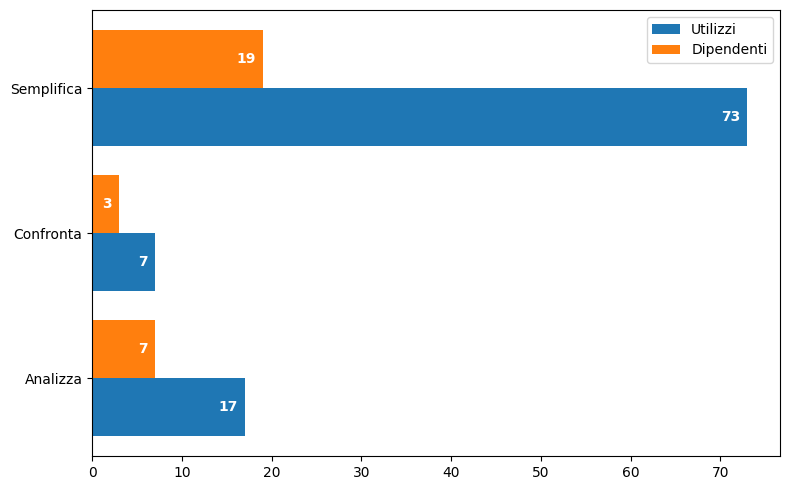

In [58]:

y = np.arange(len(summary["feature"]))
height = 0.35

fig, ax = plt.subplots(figsize=(8, 5))

bar1 = ax.barh(y - 0.2, summary["usage"], height=0.4, label='Utilizzi')
bar2 = ax.barh(y + 0.2, summary["participant"], height=0.4, label='Dipendenti')

ax.set_yticks(y)
ax.set_yticklabels(summary["feature"])
ax.legend()

def add_labels(bars):
    for bar in bars:
        width = bar.get_width()
        y_pos = bar.get_y() + bar.get_height() / 2
        ax.text(width - 0.8, 
                y_pos,
                int(width),
                ha='right', 
                va='center',
                color='white',
                fontsize=10,
                fontweight='bold')

add_labels(bar1)
add_labels(bar2)

plt.tight_layout()
plt.show()